# Cropping and Resizing

### Import resources

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import numpy as np
import cv2

%matplotlib inline

### Read in the first image of a stop sign

Image shape:  (1500, 1389, 3)


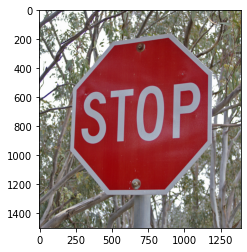

In [2]:
# Read in the image
stop1 = mpimg.imread('images/stop_sign.jpg')

print('Image shape: ', stop1.shape)
plt.imshow(stop1)

### Read in the second image

Image shape:  (640, 960, 3)


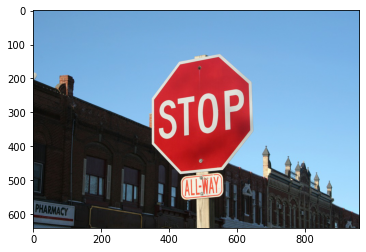

In [3]:
# Read in the image
stop2 = mpimg.imread('images/stop_sign2.jpg')

print('Image shape: ', stop2.shape)
plt.imshow(stop2)

## Crop this image so that it resembles the first image

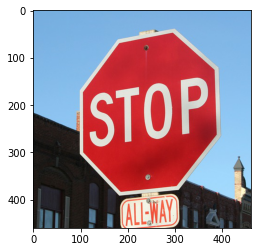

In [4]:
# To crop and image, you can use image slicing 
# which is just slicing off a portion of the image array

# Make a copy of the image to manipulate
image_crop = np.copy(stop2)

# Define how many pixels to slice off the sides of the original image
row_crop = 90
col_crop = 250

# Using image slicing, subtract the row_crop from top/bottom and col_crop from left/right
image_crop = stop2[row_crop:-row_crop, col_crop:-col_crop, :]

plt.imshow(image_crop)

## Resize the cropped image to be the same as the first

Recall that the shape of the first image is `(1500, 1389, 3)`.


Image shape:  (1500, 1389, 3)


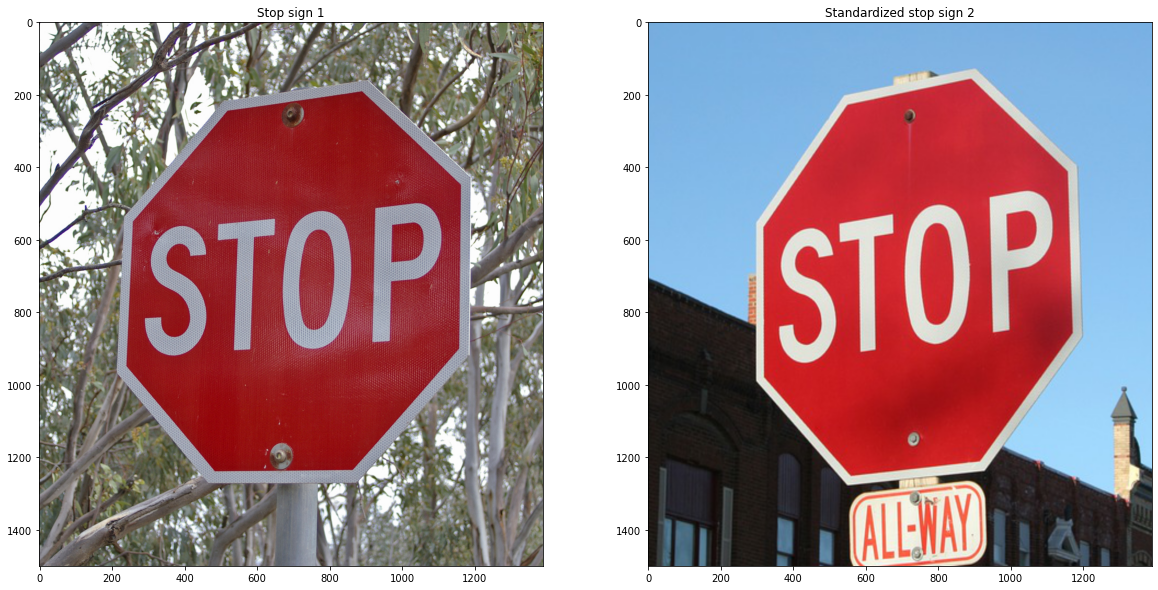

In [5]:
# Use OpenCV's resize function
standardized_im = cv2.resize(image_crop, (1389, 1500))

print('Image shape: ', standardized_im.shape)

# Plot the two images side by side
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.set_title('Stop sign 1')
ax1.imshow(stop1)
ax2.set_title('Standardized stop sign 2')
ax2.imshow(standardized_im)

## Compare these images

Now you should be able to compare these images pixel by pixel!
We'll add up the red channel values in each image, and they should be fairly close, which means we can use this similarity to characterize these images.

For comparison, we'll also show what happens when you perform this comparison using the orginal `stop_sign2.jpg`.

In [6]:
# Sum all the red channel values and compare
red_sum1 = np.sum(stop1[:,:,0])
red_sum2 = np.sum(standardized_im[:,:,0])

print('Sum of all red pixel values in the first stop sign image: ', red_sum1)
print('Sum of red pixel values in the second, standardized image: ', red_sum2)

red_sum_orig = np.sum(stop2[:,:,0])

print('\nFor comparison, the sum of red pixels in the non-standardized image: ', red_sum_orig)


Sum of all red pixel values in the first stop sign image:  294214944
Sum of red pixel values in the second, standardized image:  300109548

For comparison, the sum of red pixels in the non-standardized image:  67011798


In [ ]:
## Note: you have been given two other images:
# `yield.jpg` and `walk.jpg`
# You can look at these images and see what kind of RGB values might distinguish them

Image shape:  (684, 1024, 3)


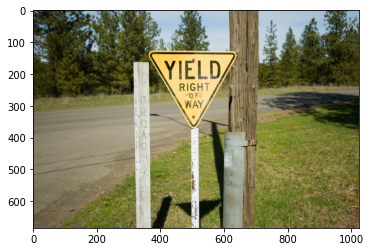

In [24]:
#load the first image
yield_rgb = mpimg.imread('images/yield.jpg')

print('Image shape: ', yield_rgb.shape)
plt.imshow(yield_rgb)

Image shape:  (245, 280, 3)


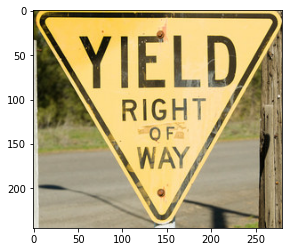

In [39]:
#Crop the first image
yield_crop = yield_rgb[130:375, 360:640, :]
print('Crop Image shape: ', yield_crop.shape)

plt.imshow(yield_crop)

Image shape:  (168, 300, 3)


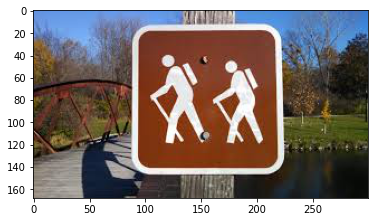

In [21]:
#load the second image
walk_rgb = mpimg.imread('images/walk.jpg')

print('Image shape: ', walk_rgb.shape)
plt.imshow(walk_rgb)

Crop Image shape:  (280, 245, 3)


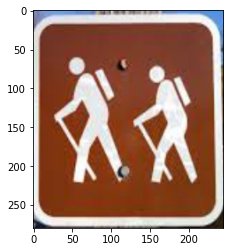

In [45]:
#Crop the second image
standardized_walk_crop = cv2.resize(walk_rgb[10:-20, 90:225, :], yield_crop.shape[:-1])
print('Crop Image shape: ', standardized_walk_crop.shape)

plt.imshow(standardiz)

#### Compare

In [54]:
# Sum all the channel values and compare
channels = ('red', 'green', 'blue')

for idx, channel in enumerate(channels):
    
    sum1 = np.sum(yield_crop[:,:,idx])
    sum2 = np.sum(standardized_walk_crop[:,:,idx])
    print(f'Sum of {channel} pixel values in the fisrt image: {sum1}')
    print(f'Sum of {channel} pixel values in the second image: {sum2}\n')


Sum of red pixel values in the fisrt image: 12296727
Sum of red pixel values in the second image: 10758605

Sum of green pixel values in the fisrt image: 11044442
Sum of green pixel values in the second image: 7687170

Sum of blue pixel values in the fisrt image: 7466235
Sum of blue pixel values in the second image: 6439618

